## This file covers code for Support Vector Machines; additionally testing for PCA

Installing relevant libraries

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, scale 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score

In [88]:
filepath = r'/Users/ureemjames/Downloads/Output_NoOutliers.csv'
data = pd.read_csv(filepath)

In [89]:
columns_to_drop = data.columns.to_list()[0]

In [90]:
data.drop(columns = [columns_to_drop], axis = 1, inplace = True)

In [91]:
object_variables = ['RIAGENDR',
'RIDRETH3',
'DMDBORN4',
'DMDEDUC2',
'DMDMARTZ',
'BPQ020',
'BPQ080',
'CDQ001',
'CDQ010',
'HSQ590',
'FSD162',
'HEQ010',
'HEQ030',
'IMQ011',
'IMQ020',
'KIQ022',
'KIQ044',
'DPQ020',
'MCQ010',
'MCQ080',
'MCQ092',
'PAQ620',
'PAQ665',
'RHQ131',
'SLQ050',
'SMQ020']

In [92]:
encoded_data = pd.get_dummies(data, columns = object_variables, prefix= object_variables, drop_first= True)

Now, that we have dropped the Sequence ID number, we have our final data set. Let's now partition the data into testing and training data.

In [93]:
target_variable = 'DIQ010'

In [94]:
predictors_df = encoded_data.drop(columns = [target_variable], axis = 1)

In [95]:
target_df = encoded_data[target_variable]

In [96]:
scaled_predictors_df = scale(predictors_df)

### Optional PCA Analysis

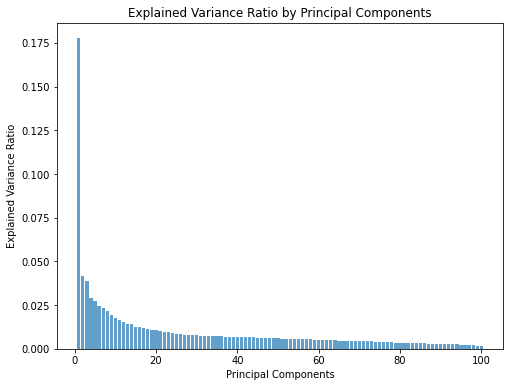

In [97]:
from sklearn.decomposition import PCA

number = 100
pca = PCA(n_components= number)
predictors_pca = pca.fit_transform(scaled_predictors_df)

explained_variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Components')
plt.show()

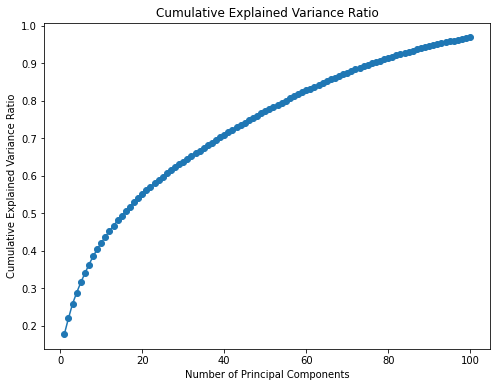

In [98]:
# cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Plot cumulative explained variance
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Plot cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio')
plt.show()


### End

In [99]:
from sklearn.model_selection import train_test_split

random_number = 1000

np.random.seed(random_number)

X_train, X_test, Y_train, Y_test = train_test_split(scaled_predictors_df, target_df, train_size=0.8, test_size=0.2, random_state=random_number)

In [100]:
Y_train.value_counts()/len(Y_train)

0    0.820272
1    0.179728
Name: DIQ010, dtype: float64

In [101]:
Y_test.value_counts()/len(Y_test)

0    0.828224
1    0.171776
Name: DIQ010, dtype: float64

In [102]:
# # scaler = StandardScaler()
# X_train_scaled = scale(X_train)
# X_test_scaled = scale(X_test)

In [103]:
from sklearn.svm import SVC

In [104]:
model = SVC()
model.fit(X_train, Y_train)

SVC()

## Now Let's try and optimize this model.

In [105]:
param_grid = [

{

    'C': [0.5,1,10,100],
    'gamma': ['scale',1,0.1,0.01,0.001,0.0001,0.000001],
    'kernel' : ['rbf']
}


]

In [106]:
original_params = GridSearchCV(model,param_grid, cv = 5, scoring = 'accuracy', verbose = 0)
original_params.fit(X_train, Y_train)

best_params = original_params.best_params_
best_estimator = original_params.best_estimator_

print(best_params)

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}


In [107]:
test_accuracy = best_estimator.score(X_test, Y_test)
y_pred = best_estimator.predict(X_test)
precision_test = precision_score(Y_test,y_pred)
recall_test = recall_score(Y_test,y_pred)
f1_score_test = f1_score(Y_test, y_pred)




print(f"Test Accuracy: {test_accuracy:.2f}; Precision: {precision_test}: Recall: {recall_test}; F1 Score: {f1_score_test}.")

Test Accuracy: 0.91; Precision: 0.8387096774193549: Recall: 0.56; F1 Score: 0.6715867158671587.
